In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, precision_score, recall_score, confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Exploración de datos


In [2]:
df = pd.read_csv('/content/recruitment_data.csv')
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [3]:
df.shape

(1500, 11)

In [4]:
numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

In [5]:
print(numeric_vars)
print(categorical_vars)

['Age', 'Gender', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'RecruitmentStrategy', 'HiringDecision']
[]


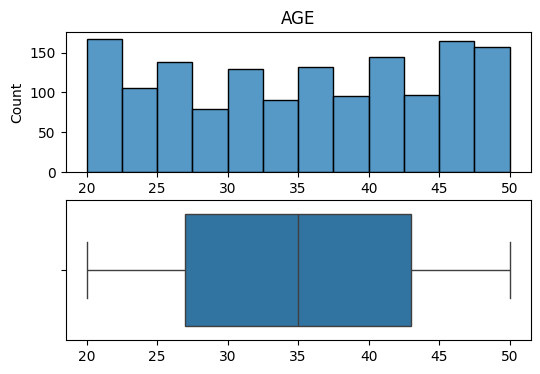

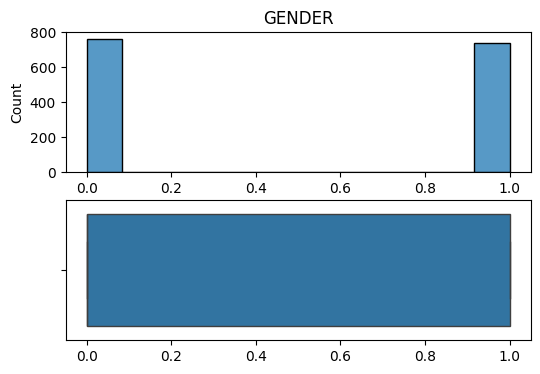

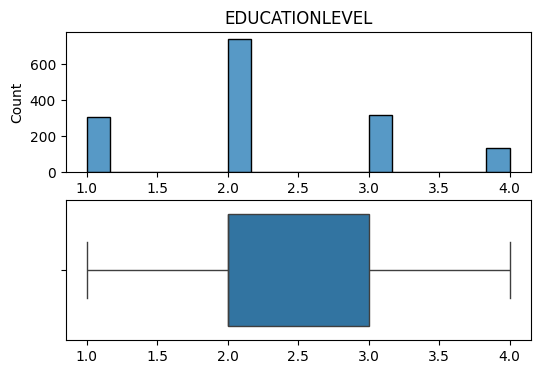

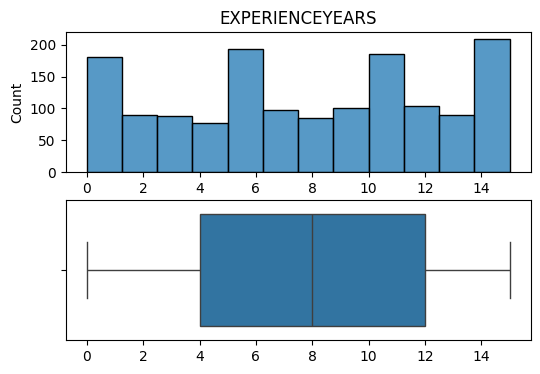

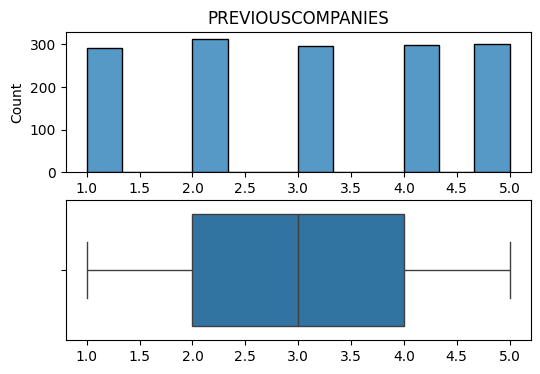

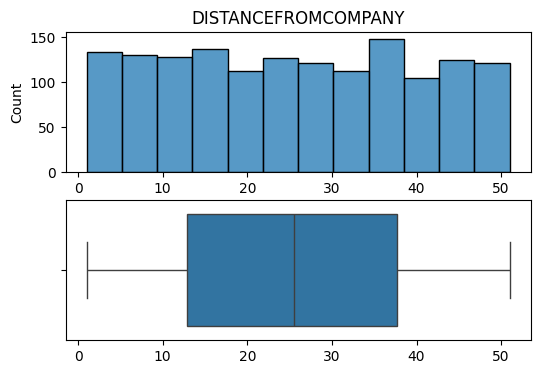

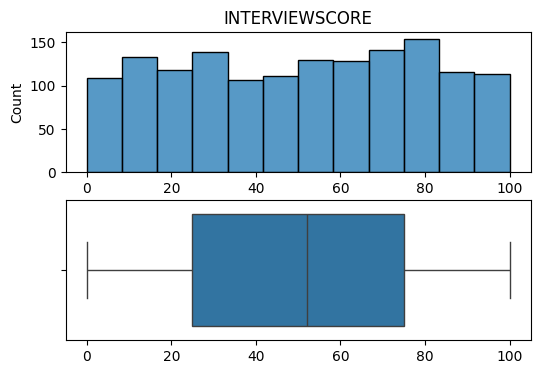

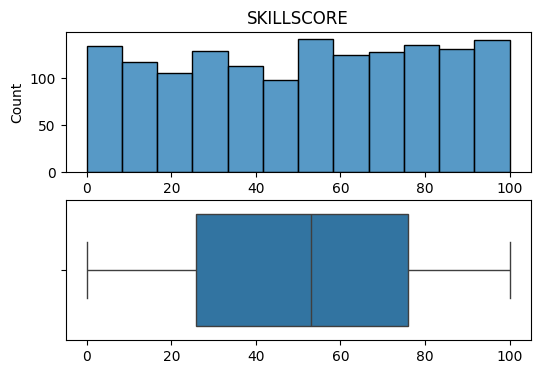

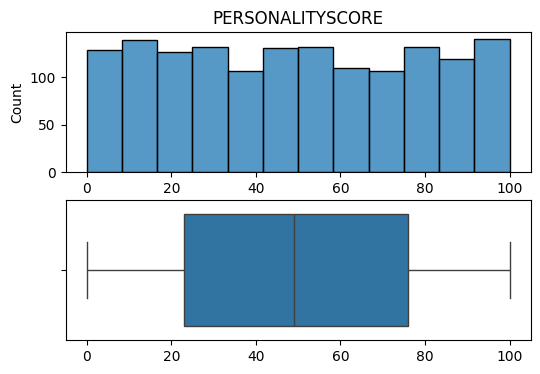

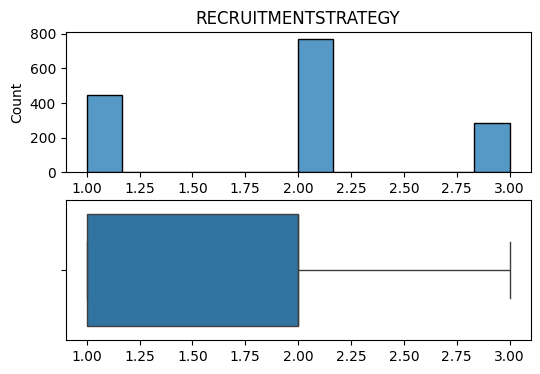

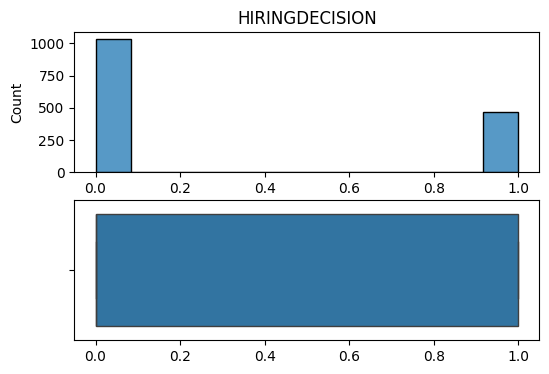

In [6]:
for i, col in enumerate(numeric_vars):
  fig, axes = plt.subplots(2, 1, figsize=(6, 4))
  sns.histplot(df[col], ax=axes[0])
  axes[0].set_title(col.upper())
  axes[0].set_xlabel('')
  sns.boxplot(x=df[col], ax=axes[1])
  axes[1].set_xlabel('')
  plt.show()

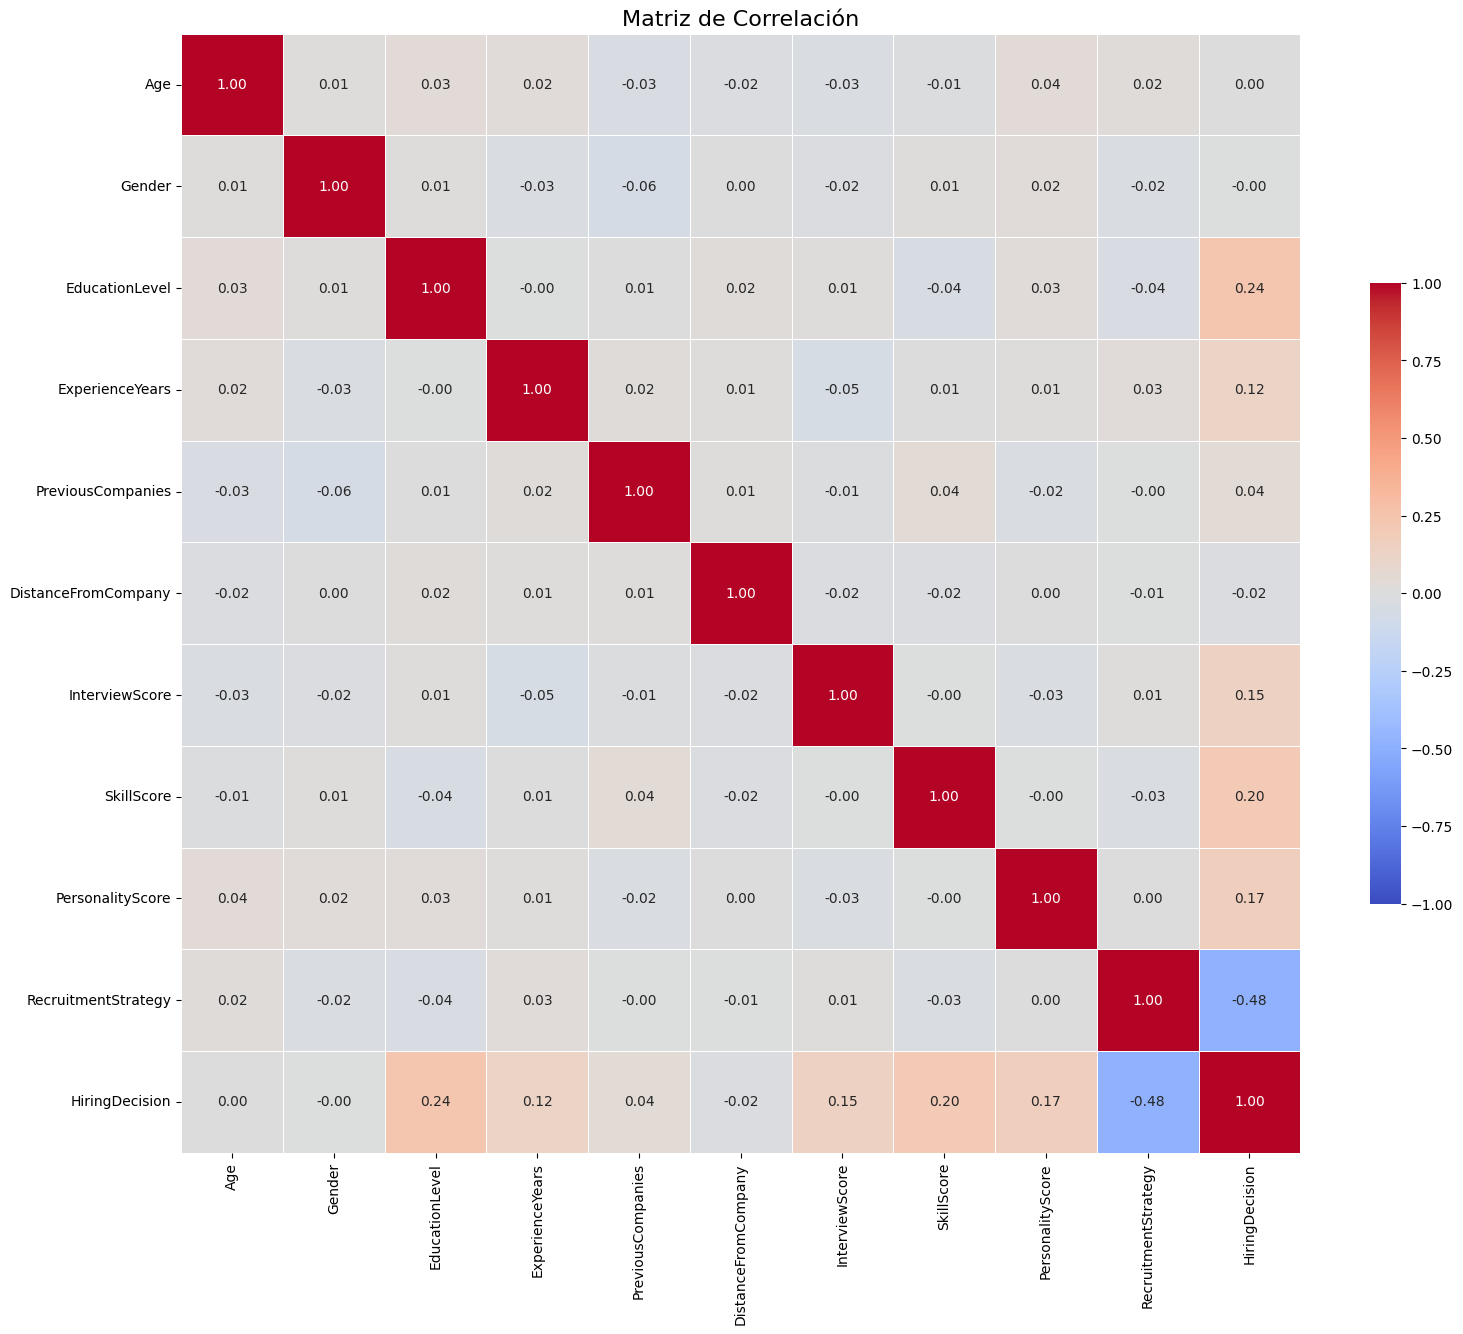

                      Age  Gender  EducationLevel  ExperienceYears  \
Age                  1.00    0.01            0.03             0.02   
Gender               0.01    1.00            0.01            -0.03   
EducationLevel       0.03    0.01            1.00            -0.00   
ExperienceYears      0.02   -0.03           -0.00             1.00   
PreviousCompanies   -0.03   -0.06            0.01             0.02   
DistanceFromCompany -0.02    0.00            0.02             0.01   
InterviewScore      -0.03   -0.02            0.01            -0.05   
SkillScore          -0.01    0.01           -0.04             0.01   
PersonalityScore     0.04    0.02            0.03             0.01   
RecruitmentStrategy  0.02   -0.02           -0.04             0.03   
HiringDecision       0.00   -0.00            0.24             0.12   

                     PreviousCompanies  DistanceFromCompany  InterviewScore  \
Age                              -0.03                -0.02           -0.03   
G

In [7]:
corr_matrix = df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

plt.title('Matriz de Correlación', fontsize=16)
plt.tight_layout()
plt.show()

print(corr_matrix.round(2))

In [9]:
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [10]:
df.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

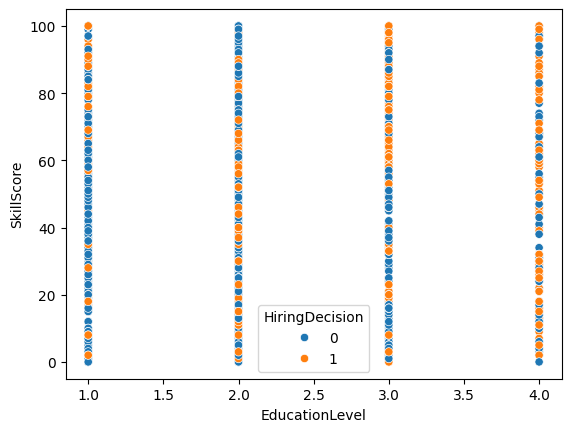

In [22]:
sns.scatterplot(x='EducationLevel', y='SkillScore', data=df, hue='HiringDecision')
plt.show()

#Ideas del proceso de Exploración:
1. Se visualiza en el proceso de exploración que el dataset contiene 1.500 registros y 10 variables asociadas al proceso de contratación.
2. Todas las variables se encuentran en formato numérico por lo que no es necesario realizar OneHotEncoding
3. No se observan datos nulos por lo que no es necesario realizar imputación
4. Se visualiza que la variable de EducationLevel tiene una de las correlaciones más altas por lo que a mayor nivel educativo es más probable que contraten a la persona.
5. Se observa que una de las estrategias de reclutamiento hace que sea más dificil contratar a la persona.

# Modelado

- Regresión logistica
- Naive Bayes
- KNN
- Arbol de decisión

In [26]:
X = df.drop('HiringDecision', axis=1)
y = df['HiringDecision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
model_reglog = LogisticRegression()
model_knn = KNeighborsClassifier()
model_nb = GaussianNB()
model_dt = DecisionTreeClassifier()



In [101]:
model_reglog.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_nb.fit(X_train, y_train)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
pred_reglog = model_reglog.predict(X_test)
pred_knn = model_knn.predict(X_test)
pred_nb = model_nb.predict(X_test)
pred_dt = model_dt.predict(X_test)

accuracy_score_reglog = accuracy_score(y_test, pred_reglog)
accuracy_score_knn = accuracy_score(y_test, pred_knn)
accuracy_score_nb = accuracy_score(y_test, pred_nb)
accuracy_score_dt = accuracy_score(y_test, pred_dt)

print(f'Regresion Logistica: {accuracy_score_reglog}')
print(f'KNN: {accuracy_score_knn}')
print(f'Naive Bayes: {accuracy_score_nb}')
print(f'Arbol de decisión: {accuracy_score_dt}')

Regresion Logistica: 0.87
KNN: 0.8166666666666667
Naive Bayes: 0.86
Arbol de decisión: 0.9133333333333333


# Búsqueda de parámetros

## KNN

In [52]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan','chebyshev']
}

grid_search_knn = GridSearchCV(model_knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [53]:
grid_search_knn.best_score_

0.8450000000000001

In [76]:
grid_search_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

## Logística

In [73]:
param_grid_rl = {
'C': [0.001, 0.01, 0.1, 1, 10, 100],
'penalty': ['l2','none'],
'solver': ['newton-cg', 'lbfgs', 'sag'],
'max_iter': [100, 200, 300]
}

In [74]:
grid_search_rl = GridSearchCV(
model_reglog,
param_grid=param_grid_rl,
cv=5,
n_jobs=-1,
verbose=1
)

grid_search_rl.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             verbose=1)

In [75]:
grid_search_rl.best_score_
#Se observa que el cambio en los hiperparámetros disminuye el accuracy

0.8591666666666665

# Naive Bayes

In [94]:
param_grid = {
'var_smoothing': np.logspace(-15, 0, 50),
'priors': [None, [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3]]
}

In [95]:
grid_search_nb = GridSearchCV(estimator=model_nb, param_grid=param_grid,
cv=5, scoring='r2', n_jobs=-1)

In [96]:
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.3, 0.7], [0.4, 0.6], [0.5, 0.5],
                                    [0.6, 0.4], [0.7, 0.3]],
                         'var_smoothing': array([1.00000000e-15, 2.02358965e-15, 4.09491506e-15, 8.28642773e-15,
       1.67683294e-14, 3.39322177e-14, 6.86648845e-14, 1.38949549e-13,
       2.81176870e-13, 5.68986603e-13, 1.15139540e-12, 2.32995181e-12,
       4.71486636e-12, 9.5...
       2.22299648e-08, 4.49843267e-08, 9.10298178e-08, 1.84206997e-07,
       3.72759372e-07, 7.54312006e-07, 1.52641797e-06, 3.08884360e-06,
       6.25055193e-06, 1.26485522e-05, 2.55954792e-05, 5.17947468e-05,
       1.04811313e-04, 2.12095089e-04, 4.29193426e-04, 8.68511374e-04,
       1.75751062e-03, 3.55648031e-03, 7.19685673e-03, 1.45634848e-02,
       2.94705170e-02, 5.96362332e-02, 1.20679264e-01, 2.44205309e-01,
       4.94171336e-01, 1.00000000e+00])},
             scoring='r2')

In [97]:
grid_search_nb.best_score_
#Se observa que el cambio en los hiperparámetros disminuye el accuracy

0.3700270691493725

# Arbol de decisión

In [105]:
param_grid = {
'max_depth': [3, 5, 7, 10, None],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'max_features': ['sqrt', 'log2', None]
}

In [108]:
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid,
cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [109]:
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [110]:
grid_search_dt.best_score_

0.9108333333333334

# Métodos de ensamble:

### Voting:

In [125]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier


In [114]:
voting_clf = VotingClassifier(
    estimators=[('knn', grid_search_knn), ('log_reg', model_reglog), ('dt', model_dt), ('nb', model_nb)],
    voting='hard'
)

In [116]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              GridSearchCV(cv=5,
                                           estimator=KNeighborsClassifier(),
                                           param_grid={'metric': ['euclidean',
                                                                  'manhattan',
                                                                  'chebyshev'],
                                                       'n_neighbors': [3, 5, 7,
                                                                       9],
                                                       'weights': ['uniform',
                                                                   'distance']})),
                             ('log_reg', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB())])

### Stacking:

In [122]:
base_models = [
('knn', grid_search_knn),
('dt', model_dt),
('nb', model_nb),
('log_reg', model_reglog)
]


In [126]:
meta_model = LogisticRegression()
stacking_clf = StackingClassifier( estimators=base_models, final_estimator=meta_model, cv=5 )

In [130]:
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('knn',
                                GridSearchCV(cv=5,
                                             estimator=KNeighborsClassifier(),
                                             param_grid={'metric': ['euclidean',
                                                                    'manhattan',
                                                                    'chebyshev'],
                                                         'n_neighbors': [3, 5,
                                                                         7, 9],
                                                         'weights': ['uniform',
                                                                     'distance']})),
                               ('dt', DecisionTreeClassifier()),
                               ('nb', GaussianNB()),
                               ('log_reg', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [131]:
print("Stacking Classifier:", accuracy_score(y_test, stacking_clf.predict(X_test)))

Stacking Classifier: 0.9433333333333334


In [132]:
#Métodos de ensamble
print("Voting Classifier:", accuracy_score(y_test, voting_clf.predict(X_test)))
print("Stacking Classifier:", accuracy_score(y_test, stacking_clf.predict(X_test)))

# Modelos iniciales
print(f'Regresion Logistica: {accuracy_score_reglog}')
print(f'KNN: {accuracy_score_knn}')
print(f'Naive Bayes: {accuracy_score_nb}')
print(f'Arbol de decisión: {accuracy_score_dt}')

# Búsqueda de parámetros
print(f'KNN_gs: {grid_search_knn.best_score_}')
print(f'Regresion_Logistica_gs: {grid_search_rl.best_score_}')
print(f'Naive_Bayes_gs: {grid_search_nb.best_score_}')
print(f'Arbol_de_decisión_gs: {grid_search_dt.best_score_}')

Voting Classifier: 0.8933333333333333
Stacking Classifier: 0.9433333333333334
Regresion Logistica: 0.87
KNN: 0.8166666666666667
Naive Bayes: 0.86
Arbol de decisión: 0.9133333333333333
KNN_gs: 0.8450000000000001
Regresion_Logistica_gs: 0.8591666666666665
Naive_Bayes_gs: 0.3700270691493725
Arbol_de_decisión_gs: 0.9108333333333334



Evaluating KNN


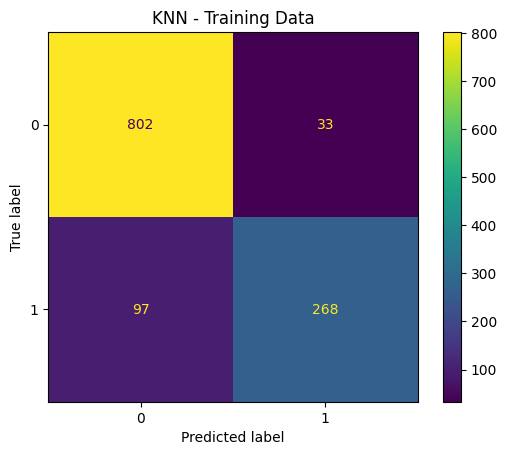

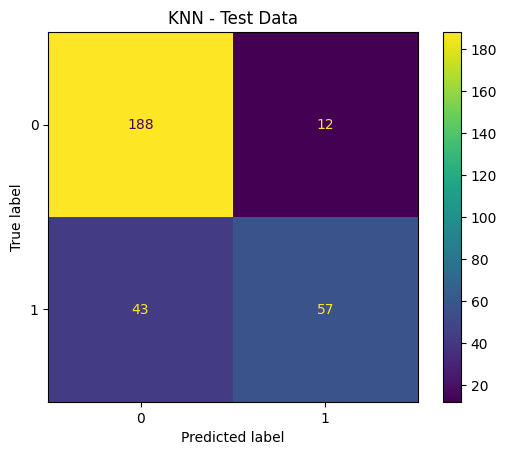

Training Data Metrics:
Precision: 0.8916
Recall: 0.8917
F1-score: 0.8885

Test Data Metrics:
Precision: 0.8179
Recall: 0.8167
F1-score: 0.8064

Evaluating Logistic Regression


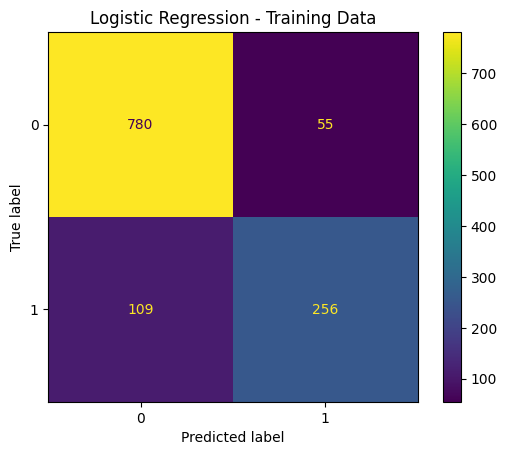

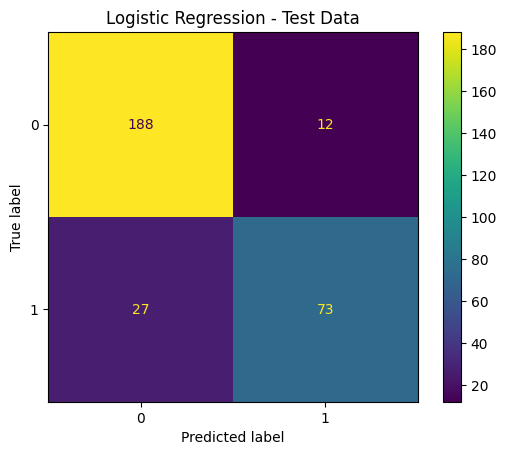

Training Data Metrics:
Precision: 0.8609
Recall: 0.8633
F1-score: 0.8600

Test Data Metrics:
Precision: 0.8692
Recall: 0.8700
F1-score: 0.8671

Evaluating Decision Tree


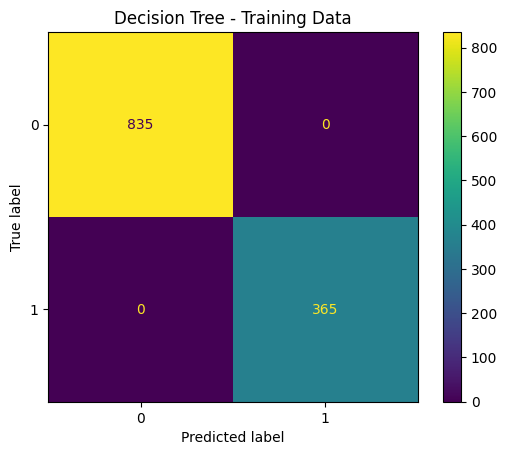

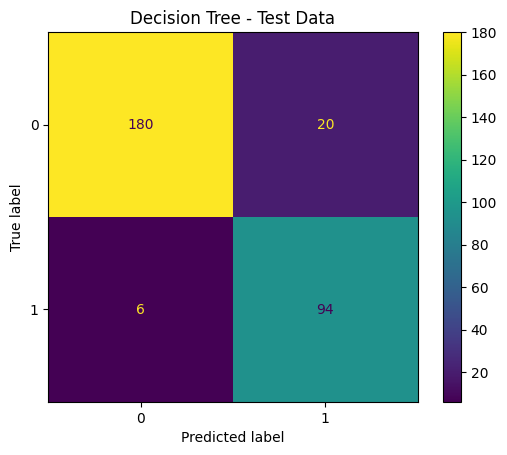

Training Data Metrics:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Test Data Metrics:
Precision: 0.9200
Recall: 0.9133
F1-score: 0.9146

Evaluating Naive Bayes


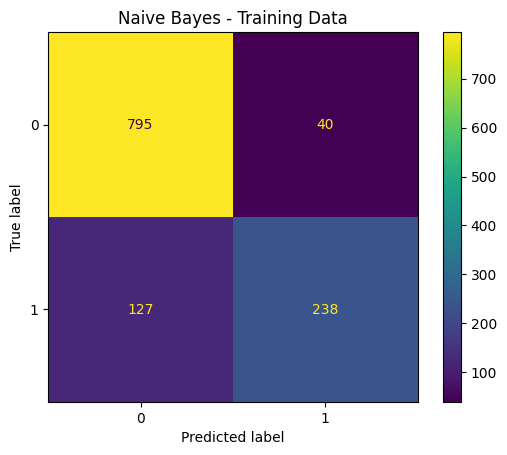

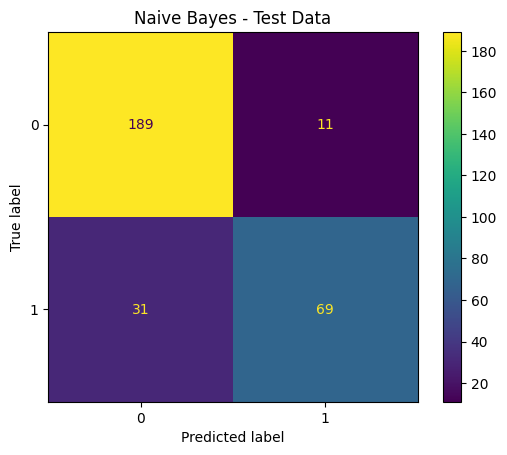

Training Data Metrics:
Precision: 0.8604
Recall: 0.8608
F1-score: 0.8549

Test Data Metrics:
Precision: 0.8602
Recall: 0.8600
F1-score: 0.8556

Evaluating Voting Classifier


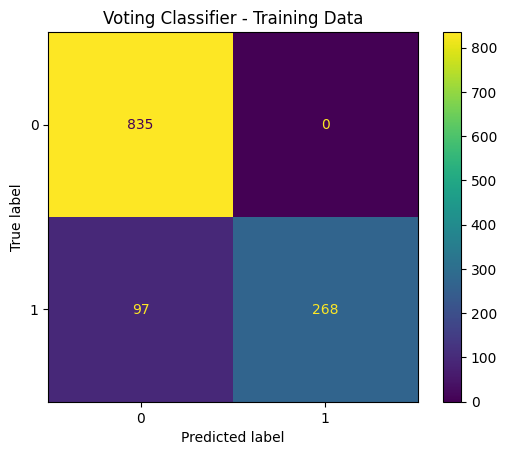

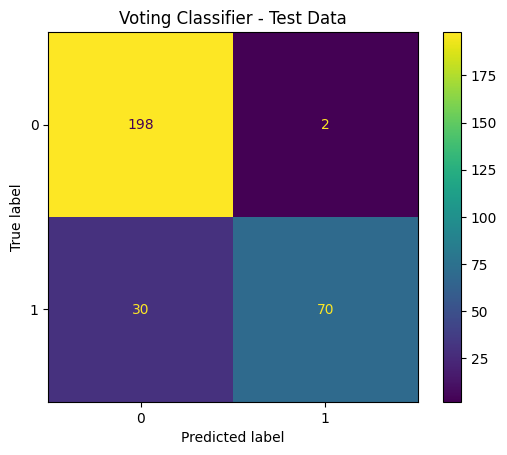

Training Data Metrics:
Precision: 0.9276
Recall: 0.9192
F1-score: 0.9152

Test Data Metrics:
Precision: 0.9030
Recall: 0.8933
F1-score: 0.8881

Evaluating Stacking Classifier


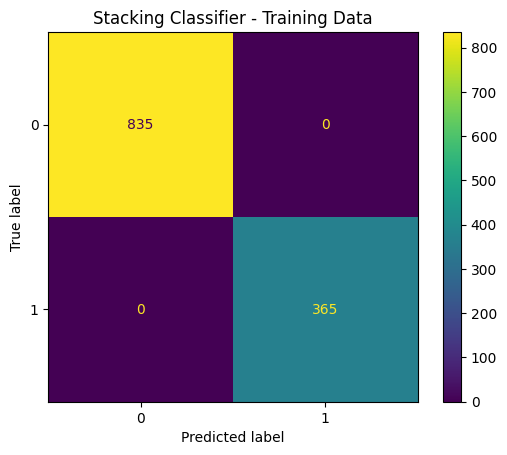

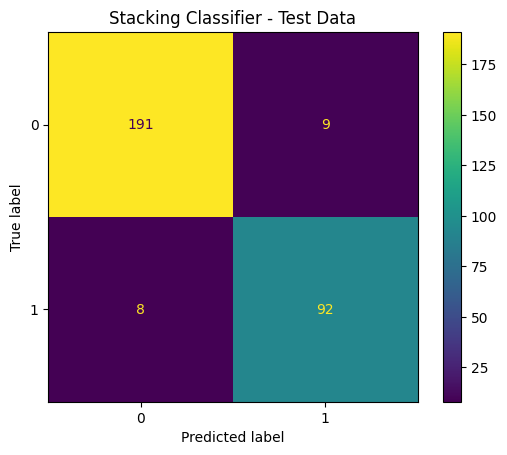

Training Data Metrics:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Test Data Metrics:
Precision: 0.9435
Recall: 0.9433
F1-score: 0.9434


In [138]:

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.show()


models = [
    ("KNN",model_knn),
    ("Logistic Regression", model_reglog),
    ("Decision Tree", model_dt),
    ("Naive Bayes", model_nb),
    ("Voting Classifier", voting_clf),
    ("Stacking Classifier", stacking_clf)
]

for name, model in models:
    print(f"\nEvaluating {name}")


    y_train_pred = model.predict(X_train)
    plot_confusion_matrix(y_train, y_train_pred, f"{name} - Training Data")


    y_test_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_test_pred, f"{name} - Test Data")


    from sklearn.metrics import precision_score, recall_score, f1_score

    print("Training Data Metrics:")
    print(f"Precision: {precision_score(y_train, y_train_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_train, y_train_pred, average='weighted'):.4f}")
    print(f"F1-score: {f1_score(y_train, y_train_pred, average='weighted'):.4f}")

    print("\nTest Data Metrics:")
    print(f"Precision: {precision_score(y_test, y_test_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_test_pred, average='weighted'):.4f}")
    print(f"F1-score: {f1_score(y_test, y_test_pred, average='weighted'):.4f}")

-  El mejor modelo observado es el modelo de regresión logística aplicando el Stacking Classifier.
-  Teniendo en cuenta el contexto del dataset, al tratarse de predicciones sobre la contratación o no de una persona y que el mejor modelo arrojó una presición del 94% de accuracy, sí lo utilizaríamos en un caso real.